In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os import listdir
from os.path import isfile, join
import seaborn as sns

In [122]:
dataset_folder_path = 'Dataset/'
def read_data(x):
    df = pd.read_csv(f'{dataset_folder_path}{x}')
    return df

In [123]:
circuits = read_data("circuits.csv")
drivers = read_data("drivers.csv")
laptimes = read_data("lap_times.csv")
races= read_data("races.csv")
results = read_data("races.csv")
status = read_data("status.csv")

In [124]:
top_100 = read_data("top_100_races_f1.csv")
top_100

,Ranking,raceId,circuitId,name,rating,year
0,1,879,18,Brazilian Grand Prix,9.45,2012
1,2,1020,10,German Grand Prix,9.44,2019
2,3,843,17,Chinese Grand Prix,9.24,2011
3,4,906,7,Canadian Grand Prix,9.19,2014
4,5,910,11,Hungarian Grand Prix,9.14,2014
...,...,...,...,...,...,...
95,96,855,22,Japanese Grand Prix,7.57,2011
96,97,975,7,Canadian Grand Prix,7.55,2017
97,98,353,35,South Korean Grand Prix,7.54,2010
98,99,970,17,Chinese Grand Prix,7.53,2017


In [125]:
top_100['name'].unique()

array(['Brazilian Grand Prix', 'German Grand Prix', 'Chinese Grand Prix',
       'Canadian Grand Prix', 'Hungarian Grand Prix',
       'United States Grand Prix', 'Bahrain Grand Prix',
       'Russian Grand Prix', 'Turkish Grand Prix', 'British Grand Prix',
       'Austrian Grand Prix', 'Abu Dhabi Grand Prix', 'Sakhir Grand Prix',
       'Azerbaijan Grand Prix', 'European Grand Prix',
       'Spanish Grand Prix', 'Australian Grand Prix',
       'Malaysian Grand Prix', 'Italian Grand Prix', 'Belgian Grand Prix',
       'Sao Paulo Grand Prix', 'French Grand Prix', 'Monaco Grand Prix',
       'Emilia-Romagna Grand Prix', 'Saudi Arabian Grand Prix',
       'Japanese Grand Prix', 'South Korean Grand Prix'], dtype=object)

In [126]:
top_100['year'].unique()

array([2012, 2019, 2011, 2014, 2015, 2021, 2020, 2022, 2017, 2018, 2008,
       2016, 2010, 2009, 2013], dtype=int64)

In [127]:
type_top_100 = {
    "Ranking": str,
    "raceId": int,
    "circuitId": int,
    "name": str,
    "rating": float,
    "year": int
}
top_100 = top_100.astype(type_top_100, errors="ignore")
top_100.dropna(how="any", inplace=True)

In [128]:
year_colors={
    2008: 'rebeccapurple',
    2009: 'blue',
    2010: 'lime',
    2011: 'orange',
    2012: 'skyblue',
    2013: 'red',
    2014: 'turquoise',
    2015: 'yellow',
    2016: 'darkgreen',
    2017: 'khaki',
    2018: 'hotpink',
    2019: 'aqua',
    2020: 'crimson',
    2021: 'darkolivegreen',
    2022: 'sandybrown'
}


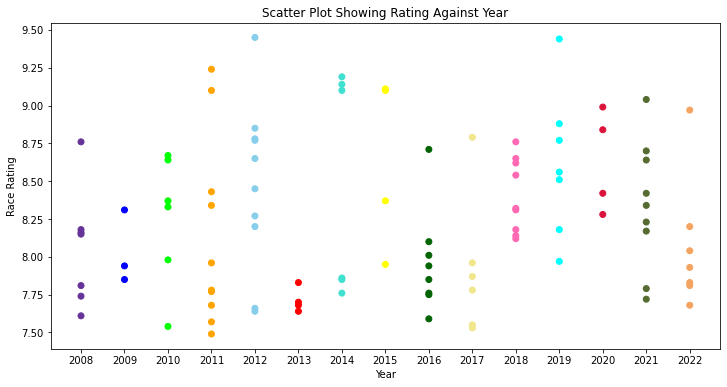

In [129]:
#Scatter plot rating vs year
plt.figure(figsize=(12,6))
plt.scatter(x=top_100['year'], y=top_100['rating'], color=[year_colors[year] for year in top_100["year"]])
plt.title("Scatter Plot Showing Rating Against Year")
plt.xlabel("Year")
plt.ylabel("Race Rating")
plt.xticks(top_100['year'].unique())
plt.show()


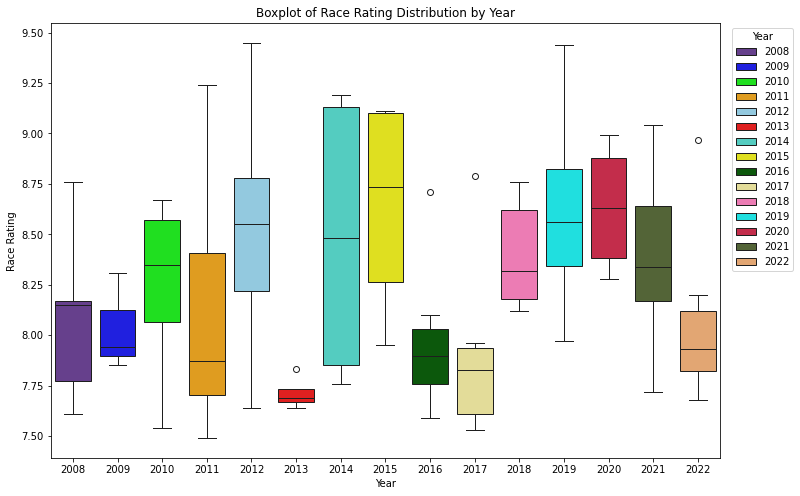

In [130]:
#Boxplot for race rating
plt.figure(figsize=(12,8))
sns.boxplot(x='year', y='rating', data=top_100, hue='year', palette=year_colors)
plt.title("Boxplot of Race Rating Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Race Rating")
plt.legend(title="Year", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

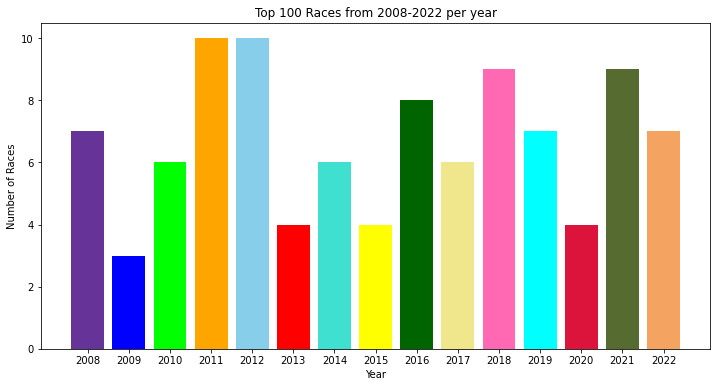

In [131]:
#Number of races per year
race_counts = top_100.groupby('year')['name'].count()

plt.figure(figsize=(12,6))
plt.bar(x=race_counts.index, height=race_counts.values, color=[year_colors[year] for year in race_counts.index])
plt.title("Top 100 Races from 2008-2022 per year")
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.xticks(top_100['year'].unique())
plt.show()

In [132]:
race_counts

year
2008     7
2009     3
2010     6
2011    10
2012    10
2013     4
2014     6
2015     4
2016     8
2017     6
2018     9
2019     7
2020     4
2021     9
2022     7
Name: name, dtype: int64

In [133]:
top_100_circuits = pd.merge(top_100, circuits, on="circuitId", how="left")
top_100_circuits = top_100_circuits.drop(['lat', 'lng', 'alt', 'name_x'], axis=1)
top_100_circuits = top_100_circuits.rename(columns={'name_y': 'name'})
top_100_circuits

,Ranking,raceId,circuitId,rating,year,circuitRef,name,location,country
0,1,879,18,9.45,2012,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil
1,2,1020,10,9.44,2019,hockenheimring,Hockenheimring,Hockenheim,Germany
2,3,843,17,9.24,2011,shanghai,Shanghai International Circuit,Shanghai,China
3,4,906,7,9.19,2014,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
4,5,910,11,9.14,2014,hungaroring,Hungaroring,Budapest,Hungary
...,...,...,...,...,...,...,...,...,...
95,96,855,22,7.57,2011,suzuka,Suzuka Circuit,Suzuka,Japan
96,97,975,7,7.55,2017,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
97,98,353,35,7.54,2010,yeongam,Korean International Circuit,Yeongam County,Korea
98,99,970,17,7.53,2017,shanghai,Shanghai International Circuit,Shanghai,China


In [134]:
race_ratings_2022_2021_2019 = read_data("All_Races_Ratings.csv")
race_ratings_2022_2021_2019

,raceId,circuitId,name,rating,year
0,1094,32,Mexican Grand Prix,3.90,2022
1,1081,73,Azerbaijan Grand Prix,5.03,2022
2,1089,14,Italian Grand Prix,5.28,2022
3,1092,22,Japanese Grand Prix,5.44,2022
4,1078,79,Miami Grand Prix,5.63,2022
...,...,...,...,...,...
59,1011,3,Bahrain Grand Prix,8.50,2019
60,1019,9,British Grand Prix,8.60,2019
61,1029,18,Brazilian Grand Prix,8.80,2019
62,1018,70,Austrian Grand Prix,8.90,2019


In [135]:
#Race Ratings Data Frame
#Concat top 100 and race ratings from 2022, 2021, and 2019
#merge top 100 
race_ratings = pd.concat([top_100, race_ratings_2022_2021_2019])
race_ratings = race_ratings.drop_duplicates(subset='raceId')
race_ratings = race_ratings.drop(['Ranking'], axis=1)
race_ratings = pd.merge(race_ratings, circuits, on="circuitId", how="left")
race_ratings = race_ratings.drop(['lat', 'lng', 'alt'], axis=1)
race_ratings = race_ratings.rename(
    columns={
        'name_x': 'Grand Prix',
        'name_y': 'Circuit Name',
        'rating': 'Race Rating',
        'year': 'Year',
        'location': 'Location',
        'country': 'Country'
            })
race_ratings.sort_values(by="Race Rating", ascending=False, inplace=True)
race_ratings

,raceId,circuitId,Grand Prix,Race Rating,Year,circuitRef,Circuit Name,Location,Country
0,879,18,Brazilian Grand Prix,9.45,2012,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil
1,1020,10,German Grand Prix,9.44,2019,hockenheimring,Hockenheimring,Hockenheim,Germany
2,843,17,Chinese Grand Prix,9.24,2011,shanghai,Shanghai International Circuit,Shanghai,China
3,906,7,Canadian Grand Prix,9.19,2014,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
4,910,11,Hungarian Grand Prix,9.14,2014,hungaroring,Hungaroring,Budapest,Hungary
...,...,...,...,...,...,...,...,...,...
129,1016,7,Canadian Grand Prix,4.40,2019,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
116,1056,6,Monaco Grand Prix,4.00,2021,monaco,Circuit de Monaco,Monte-Carlo,Monaco
100,1094,32,Mexican Grand Prix,3.90,2022,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico
128,1017,34,French Grand Prix,3.50,2019,ricard,Circuit Paul Ricard,Le Castellet,France


In [137]:
race_ratings['Circuit Name'].unique()

array(['Autódromo José Carlos Pace', 'Hockenheimring',
       'Shanghai International Circuit', 'Circuit Gilles Villeneuve',
       'Hungaroring', 'Circuit of the Americas',
       'Bahrain International Circuit', 'Sochi Autodrom', 'Istanbul Park',
       'Silverstone Circuit', 'Red Bull Ring', 'Yas Marina Circuit',
       'Baku City Circuit', 'Valencia Street Circuit',
       'Circuit de Barcelona-Catalunya', 'Albert Park Grand Prix Circuit',
       'Sepang International Circuit', 'Nürburgring',
       'Autodromo Nazionale di Monza', 'Circuit de Spa-Francorchamps',
       'Circuit Paul Ricard', 'Circuit de Monaco',
       'Autodromo Enzo e Dino Ferrari', 'Jeddah Corniche Circuit',
       'Suzuka Circuit', 'Korean International Circuit',
       'Circuit Park Zandvoort', 'Autódromo Hermanos Rodríguez',
       'Marina Bay Street Circuit', 'Losail International Circuit',
       'Autódromo Internacional do Algarve',
       'Miami International Autodrome'], dtype=object)

In [ ]:
#See if circuit matters in terms of rating
race_ratings['NameOfCircuit'] = race_ratings.loc[:, 'Circuit Name']
circuit_rating = race_ratings.groupby(by=["NameOfCircuit", "Location", "Country"], as_index=False).aggregate(
    {
        "Circuit Name": 'count',
        "Race Rating": 'mean' 
    }
).rename(({"Circuit Name": "Circuit Count"}), axis = 1)

circuit_rating.sort_values(by="Race Rating", ascending=False, inplace=True)
circuit_rating

,NameOfCircuit,Location,Country,Circuit Count,Race Rating
5,Autódromo José Carlos Pace,São Paulo,Brazil,8,8.493750
15,Hockenheimring,Hockenheim,Germany,3,8.480000
6,Bahrain International Circuit,Sakhir,Bahrain,8,8.378750
16,Hungaroring,Budapest,Hungary,7,8.374286
14,Circuit of the Americas,Austin,USA,6,8.361667
11,Circuit de Barcelona-Catalunya,Montmeló,Spain,3,8.283333
25,Sepang International Circuit,Kuala Lumpur,Malaysia,4,8.152500
27,Silverstone Circuit,Silverstone,UK,8,8.050000
23,Nürburgring,Nürburg,Germany,2,8.035000
26,Shanghai International Circuit,Shanghai,China,7,7.860000


In [ ]:
circuit_colors={
    "Autódromo José Carlos Pace": 'rebeccapurple',
    "Hockenheimring": 'blue',
    "Bahrain International Circuit": 'lime',
    "Hungaroring": 'orange',
    "Circuit of the Americas": 'skyblue',
    "Circuit de Barcelona-Catalunya": 'red',
    "Sepang International Circuit": 'turquoise',
    "Silverstone Circuit": 'yellow',
    "Nürburgring": 'darkgreen',
    "Shanghai International Circuit": 'khaki',
    "Istanbul Park": 'hotpink',
    "Autodromo Nazionale di Monza": 'aqua',
    "Circuit Gilles Villeneuve": 'crimson',
    "Red Bull Ring": 'darkolivegreen',
    "Korean International Circuit": 'sandybrown',
    "Albert Park Grand Prix Circuit": 'aquamarine',
    "Sochi Autodrom": 'plum',
    "Autodromo Enzo e Dino Ferrari": 'slategray',
    "Baku City Circuit": 'lightgreen',
    "Jeddah Corniche Circuit": 'brown',
    "Circuit de Spa-Francorchamps": 'cornflowerblue',
    "Yas Marina Circuit": 'dimgrey',
    "Valencia Street Circuit": 'wheat',
    "Circuit Park Zandvoort": 'azure',
    "Circuit de Monaco": 'indigo',
    "Suzuka Circuit": 'darkslategrey',
    "Losail International Circuit": 'lavender',
    "Marina Bay Street Circuit": 'salmon',
    "Autódromo Internacional do Algarve": 'linen',
    "Circuit Paul Ricard": 'lightgoldenrodyellow',
    "Miami International Autodrome": 'lawngreen',
    "Autódromo Hermanos Rodríguez": 'steelblue'
}


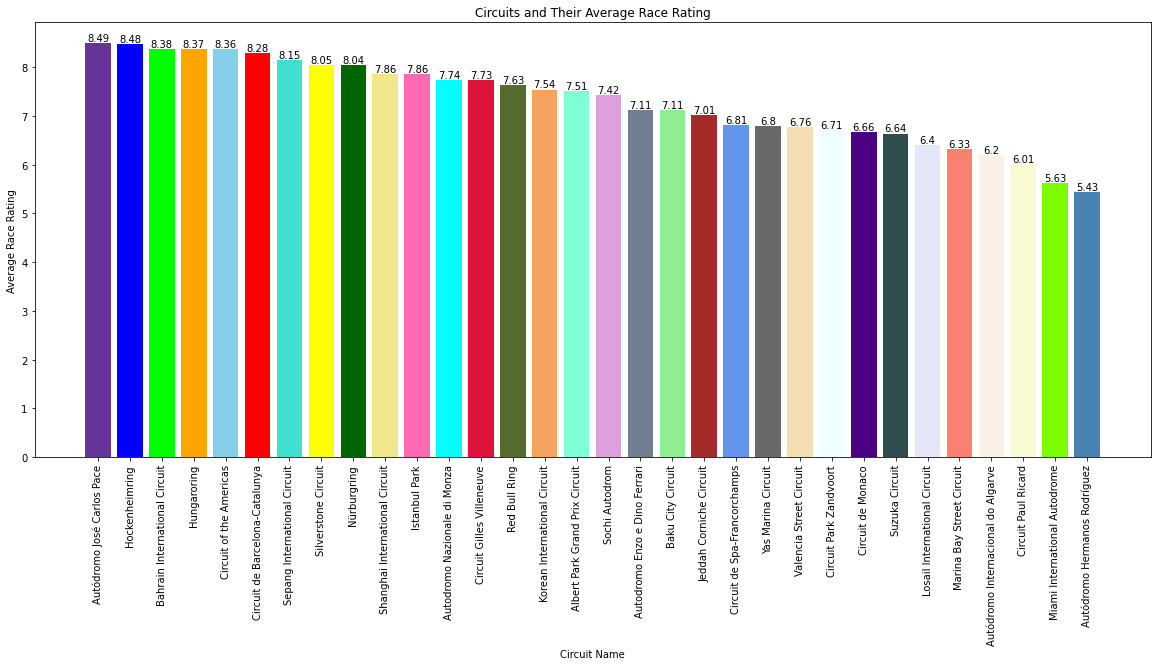

In [ ]:
# Plot bar Graph
plt.figure(figsize=(20,8))
bars = plt.bar(x=circuit_rating["NameOfCircuit"], height=circuit_rating["Race Rating"], color=[circuit_colors[CircuitName] for CircuitName in circuit_rating["NameOfCircuit"]])
plt.title("Circuits and Their Average Race Rating")
plt.xlabel("Circuit Name")
plt.ylabel("Average Race Rating")
plt.xticks(rotation=90)

for bar, height in zip(bars, circuit_rating["Race Rating"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(height, 2)),
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()